<a href="https://colab.research.google.com/github/ericmuga253/ML_2/blob/main/week1project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re
from sklearn.linear_model import ElasticNet


In [2]:
cars=pd.read_csv('/content/second_hand_cars.csv')
cars.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,Transmission Type,Body Color,Service Record,Insurance,Registration Certificate,Accessories
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,Manual,Grey,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels"
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,Automatic,Maroon,Major Service at 131313 km,No Current Insurance,Available,NaN
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,Automatic (Tiptronic),Black,No Service Record,No Current Insurance,Available,NaN
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,Automatic (Tiptronic),Maroon,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels"
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,Automatic (Tiptronic),Silver,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System"


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company Name              2500 non-null   object
 1   Car Name                  2500 non-null   object
 2   Variant                   2238 non-null   object
 3   Fuel Type                 2500 non-null   object
 4   Tyre Condition            2500 non-null   object
 5   Make Year                 2500 non-null   int64 
 6   Owner Type                2500 non-null   object
 7   Registration Number       2500 non-null   object
 8   Mileage                   2500 non-null   int64 
 9   Price                     2500 non-null   int64 
 10  Transmission Type         2500 non-null   object
 11  Body Color                2500 non-null   object
 12  Service Record            2500 non-null   object
 13  Insurance                 2500 non-null   object
 14  Registration Certificate

In [4]:
missing_values=cars.isnull().sum()
print(missing_values)

Company Name                  0
Car Name                      0
Variant                     262
Fuel Type                     0
Tyre Condition                0
Make Year                     0
Owner Type                    0
Registration Number           0
Mileage                       0
Price                         0
Transmission Type             0
Body Color                    0
Service Record                0
Insurance                     0
Registration Certificate      0
Accessories                 482
dtype: int64


<Axes: >

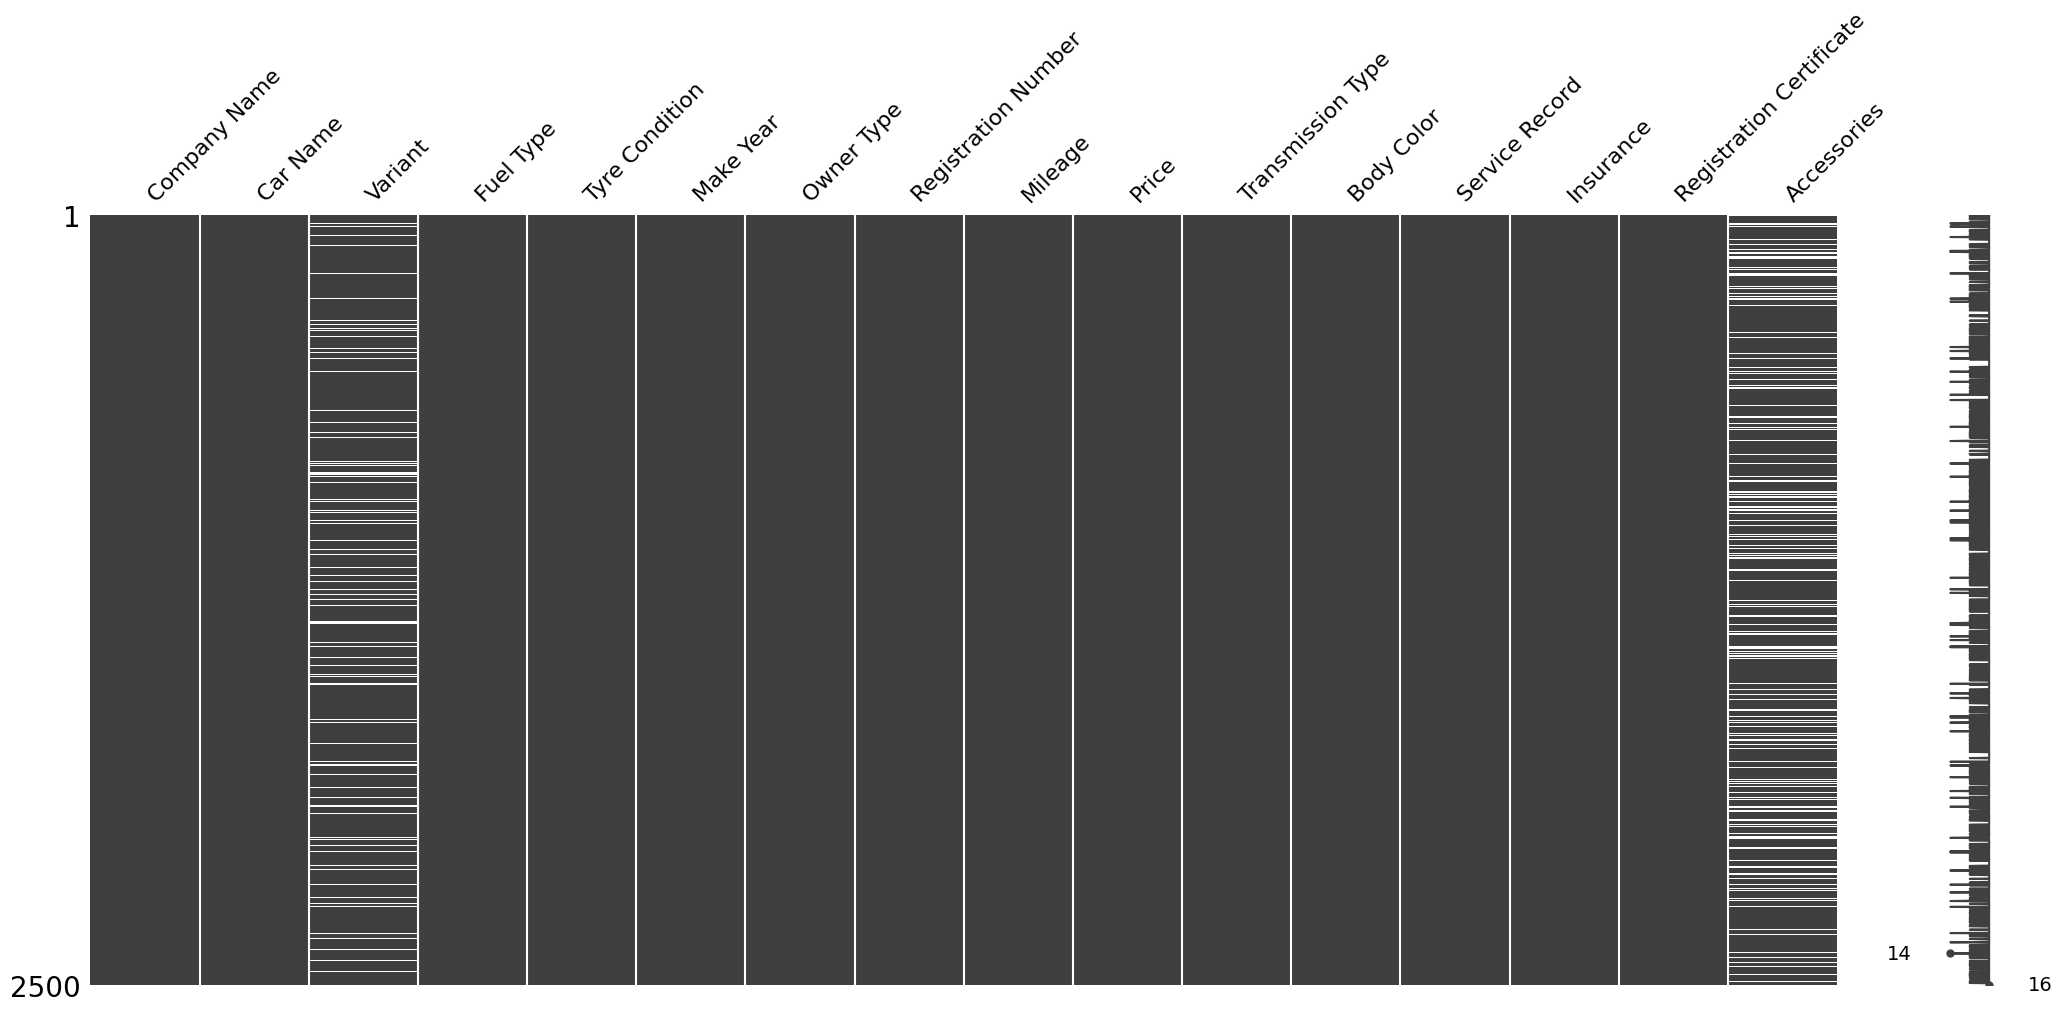

In [5]:
msno.matrix(cars)

In [6]:
cars['Accessories'] = cars['Accessories'].fillna(method='ffill')
cars['Variant'] = cars['Variant'].fillna(method='ffill')


<Axes: >

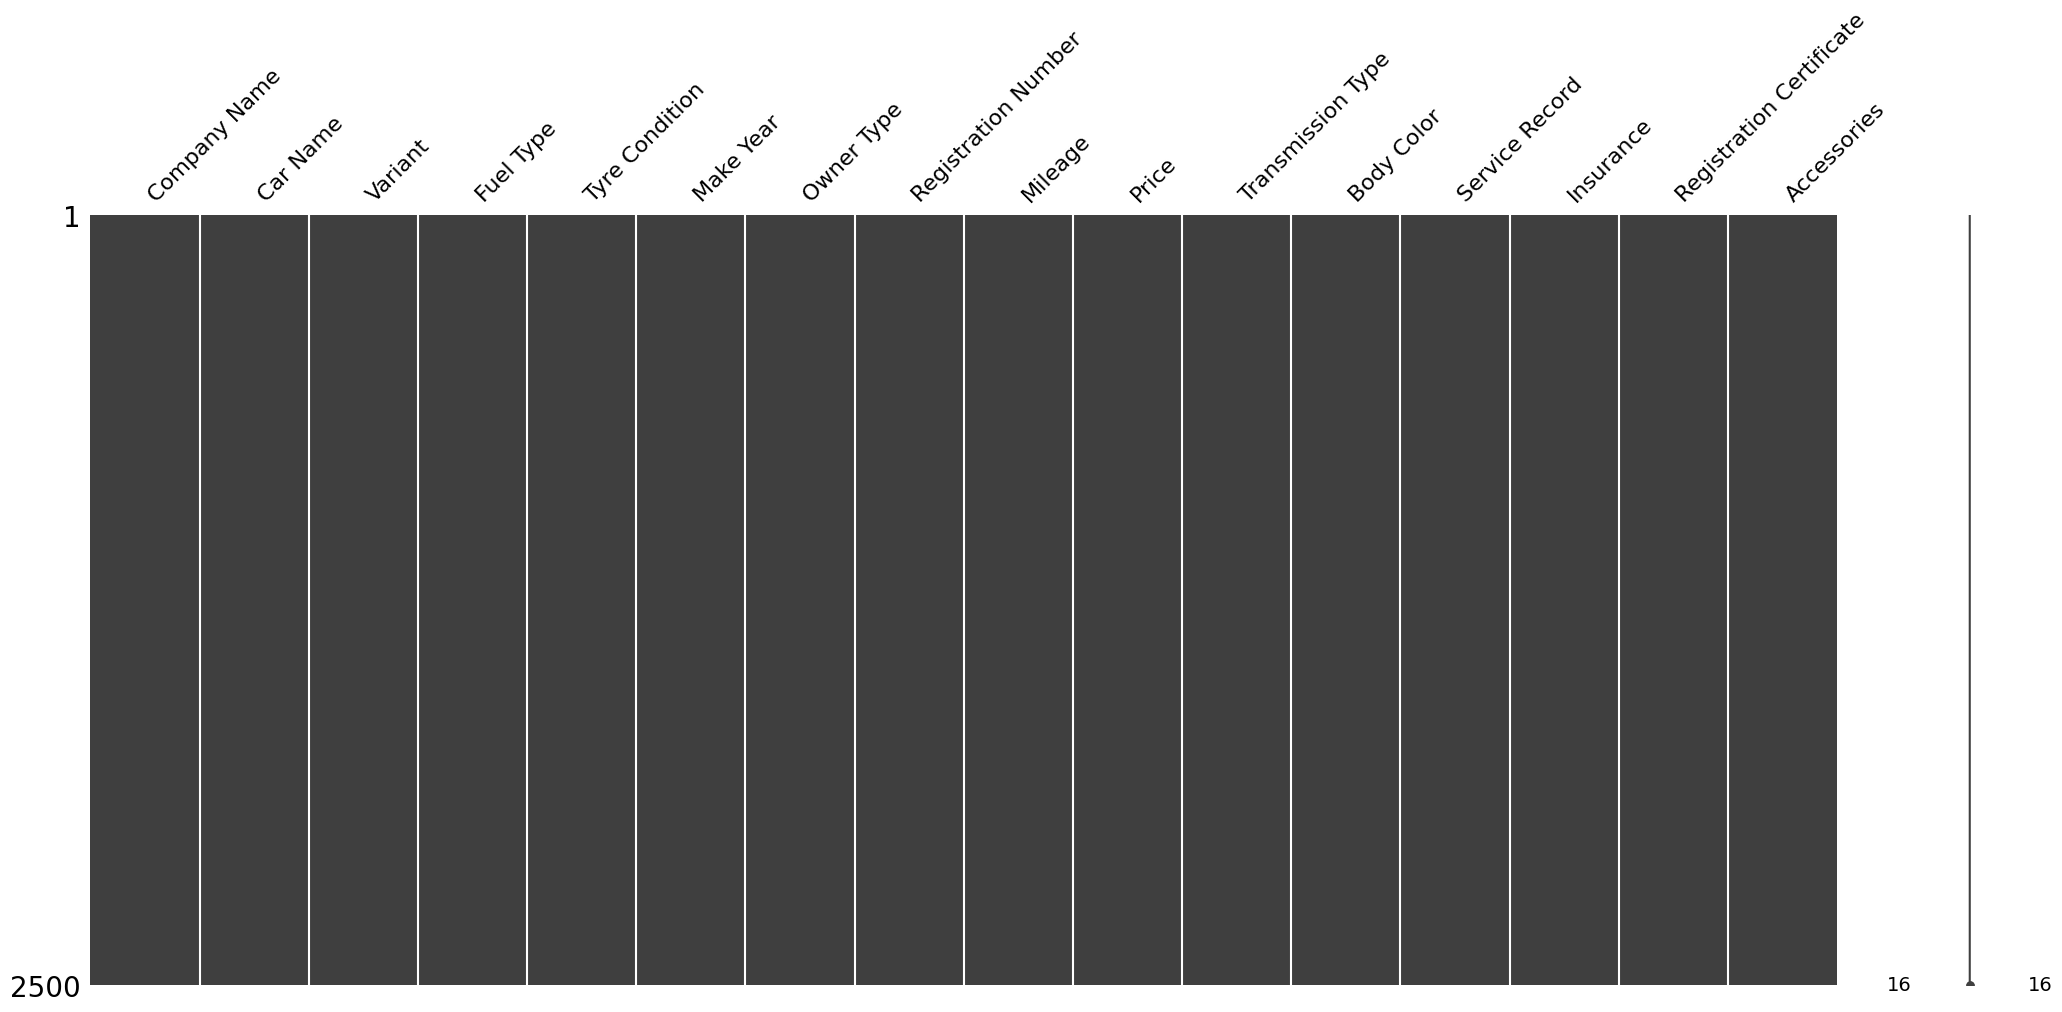

In [7]:
msno.matrix(cars)

In [8]:
cars.dtypes

Company Name                object
Car Name                    object
Variant                     object
Fuel Type                   object
Tyre Condition              object
Make Year                    int64
Owner Type                  object
Registration Number         object
Mileage                      int64
Price                        int64
Transmission Type           object
Body Color                  object
Service Record              object
Insurance                   object
Registration Certificate    object
Accessories                 object
dtype: object

In [9]:
# Extract mileage at service
cars['Mileage at Last Service'] = cars['Service Record'].str.extract(r'(\d+) km').astype(float)

# Function to extract accessories
def extract_accessories(accessories):
    if pd.isna(accessories):
        return []
    return re.split(r',\s*', accessories)

# Apply function and get all unique accessories
cars['Accessories List'] = cars['Accessories'].apply(extract_accessories)
all_accessories = set(sum(cars['Accessories List'].tolist(), []))

# Create columns for each accessory
for accessory in all_accessories:
    cars[accessory] =cars['Accessories List'].apply(lambda x: accessory in x).astype(int)

# Drop the temporary list column
cars.drop(columns=['Accessories List'], inplace=True)

# Display the updated DataFrame
cars.head()

,Company Name,Car Name,Variant,Fuel Type,Tyre Condition,Make Year,Owner Type,Registration Number,Mileage,Price,...,Service Record,Insurance,Registration Certificate,Accessories,Mileage at Last Service,Sunroof,Music System,Alloy Wheels,GPS,Leather Seats
0,Maruti Suzuki,Cruze,EX,CNG,Needs Replacement,2018,Second,84-436-5584,52798,759107,...,Major Service at 50418 km,No Current Insurance,Not Available,"Music System, Sunroof, Alloy Wheels",50418.0,1,1,1,0,0
1,Kia,Seltos,RXE,Petrol,New,2020,Third,79-114-3166,43412,505071,...,Major Service at 131313 km,No Current Insurance,Available,"Music System, Sunroof, Alloy Wheels",131313.0,1,1,1,0,0
2,Kia,Accord,RXE,Petrol,New,2022,Second,41-358-3344,95219,635322,...,No Service Record,No Current Insurance,Available,"Music System, Sunroof, Alloy Wheels",NaN,1,1,1,0,0
3,Nissan,Seltos,Highline,Diesel,Used,2024,Third,92-708-1763,70370,483152,...,Major Service at 98115 km,Valid Until [date],Available,"Music System, Alloy Wheels",98115.0,0,1,1,0,0
4,Chevrolet,Kwid,Highline,Petrol,Used,2018,Second,76-154-5485,85852,712961,...,Major Service at 135665 km,No Current Insurance,Not Available,"GPS, Music System",135665.0,0,1,0,1,0


In [10]:
missing_values=cars.isnull().sum()
print(missing_values)

Company Name                   0
Car Name                       0
Variant                        0
Fuel Type                      0
Tyre Condition                 0
Make Year                      0
Owner Type                     0
Registration Number            0
Mileage                        0
Price                          0
Transmission Type              0
Body Color                     0
Service Record                 0
Insurance                      0
Registration Certificate       0
Accessories                    0
Mileage at Last Service     1649
Sunroof                        0
Music System                   0
Alloy Wheels                   0
GPS                            0
Leather Seats                  0
dtype: int64


<Axes: >

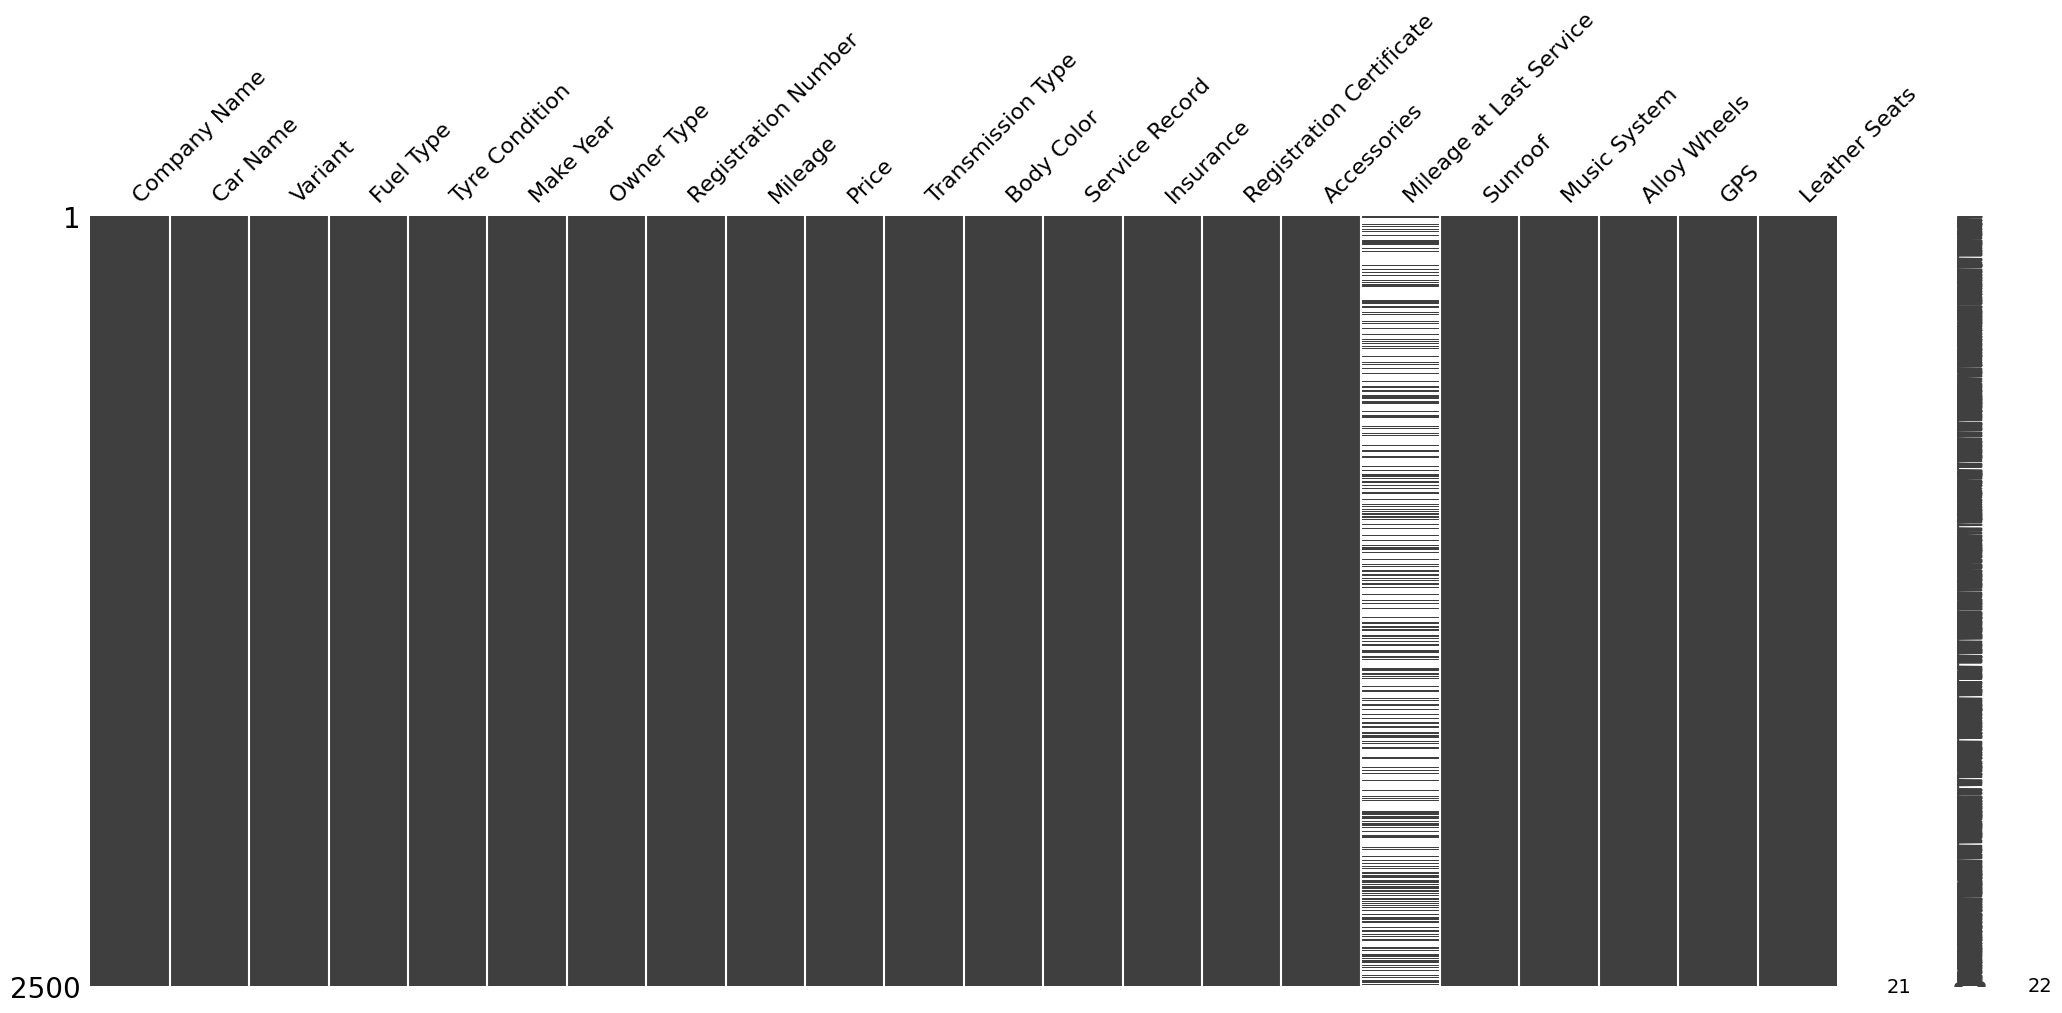

In [11]:
msno.matrix(cars)

<Axes: >

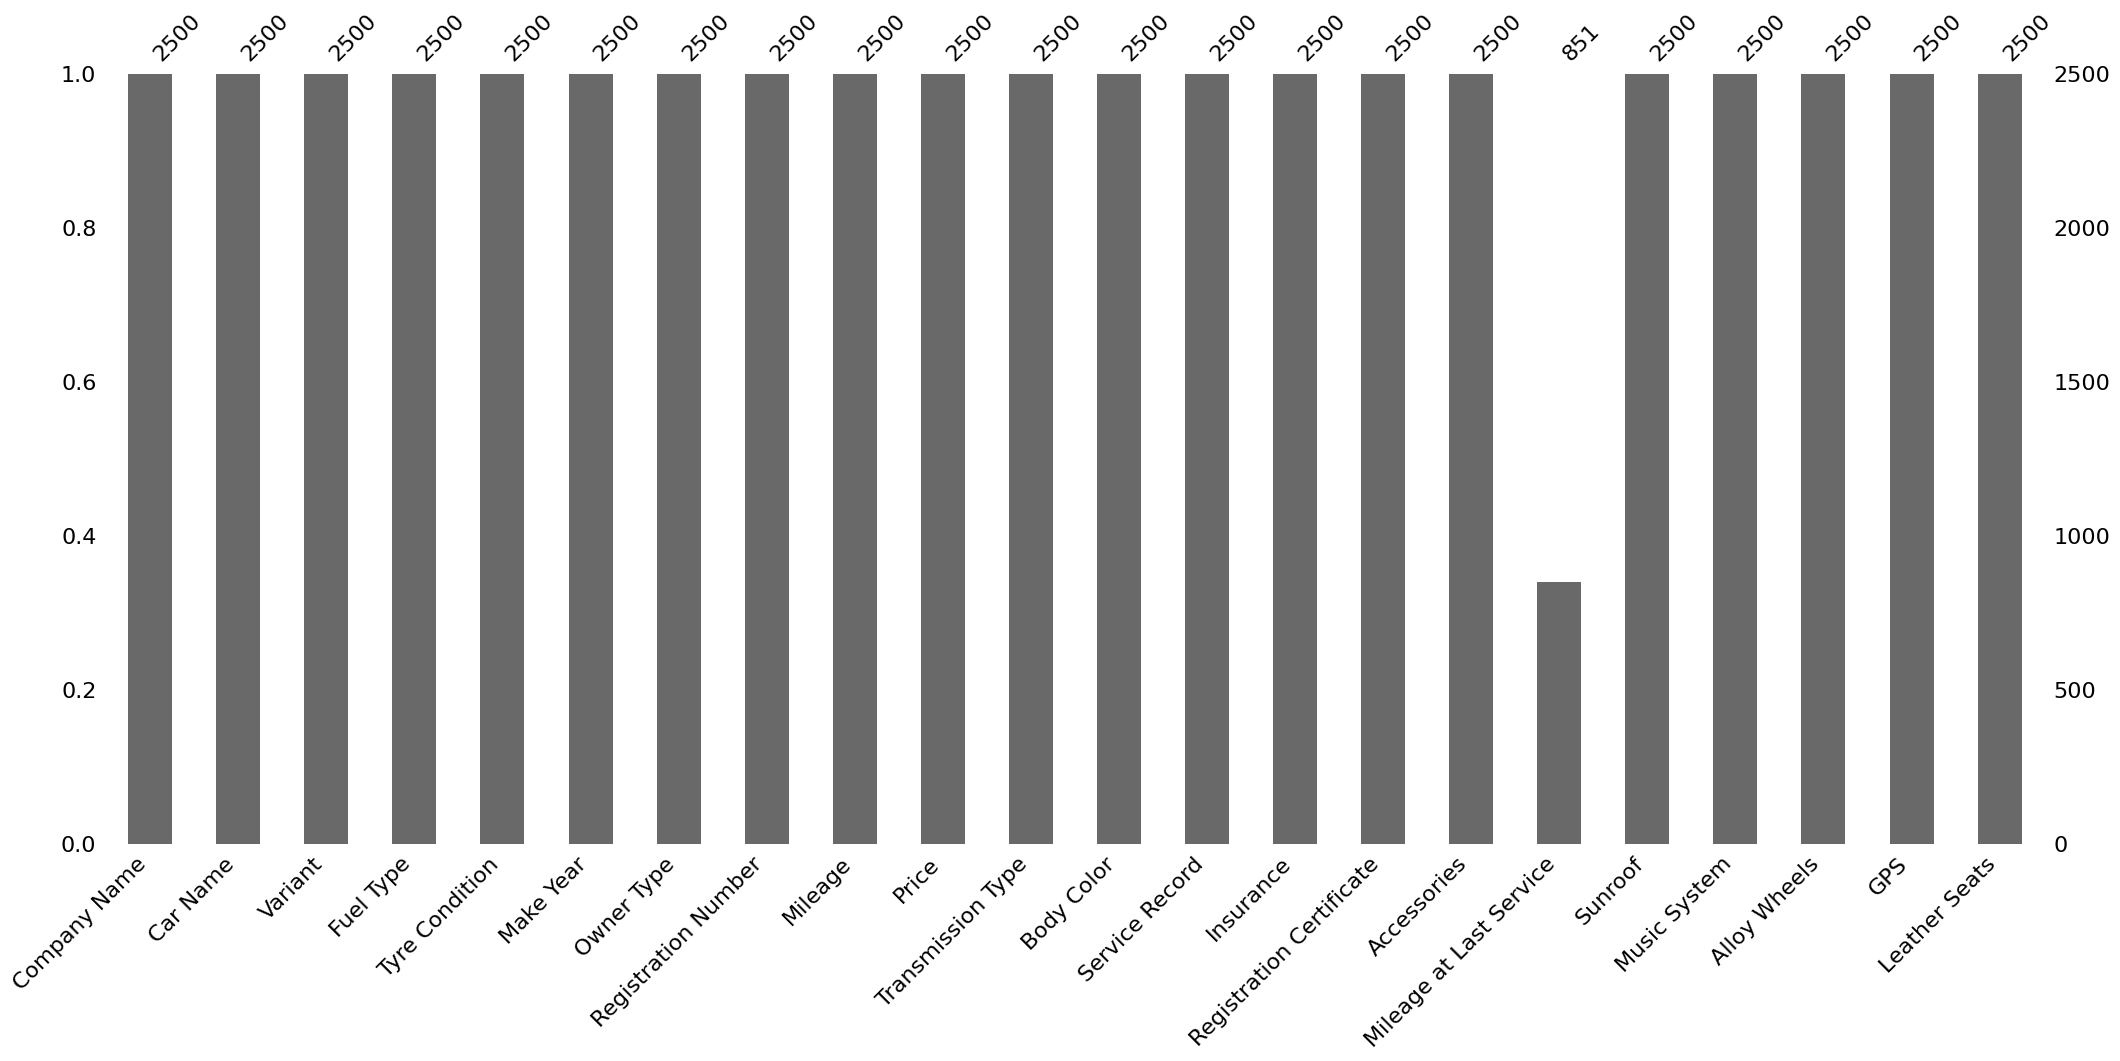

In [12]:
msno.bar(cars)

In [13]:
# Initialize LabelEncoder
le = LabelEncoder()

# List of columns to be encoded
columns_to_encode = [
    'Company Name', 'Car Name', 'Variant', 'Fuel Type', 'Tyre Condition',
    'Owner Type', 'Registration Number', 'Transmission Type', 'Body Color',
    'Service Record', 'Insurance', 'Registration Certificate', 'Accessories'
]

# Apply LabelEncoder to each column
for column in columns_to_encode:
    cars[column] = le.fit_transform(cars[column])

# Display the DataFrame after encoding
print(cars)

      Company Name  Car Name  Variant  Fuel Type  Tyre Condition  Make Year  \
0                5         2        0          0               0       2018   
1                4         7        4          2               1       2020   
2                4         0        4          2               1       2022   
3                6         7        2          1               2       2024   
4                0         5        2          2               2       2018   
...            ...       ...      ...        ...             ...        ...   
2495             8         3        4          2               1       2015   
2496             4         8        3          0               0       2024   
2497             6         8        4          1               2       2022   
2498             2         9        7          0               0       2019   
2499             7         5        1          1               0       2024   

      Owner Type  Registration Number  Mileage   Pr

In [14]:
cars.dtypes

Company Name                  int64
Car Name                      int64
Variant                       int64
Fuel Type                     int64
Tyre Condition                int64
Make Year                     int64
Owner Type                    int64
Registration Number           int64
Mileage                       int64
Price                         int64
Transmission Type             int64
Body Color                    int64
Service Record                int64
Insurance                     int64
Registration Certificate      int64
Accessories                   int64
Mileage at Last Service     float64
Sunroof                       int64
Music System                  int64
Alloy Wheels                  int64
GPS                           int64
Leather Seats                 int64
dtype: object

droppimg mileage at last service due to too many missing values

In [15]:
cars.drop(columns=['Mileage at Last Service'], inplace=True)

Scaling data

In [16]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(cars.drop('Price',axis=1))

Choosing number of components

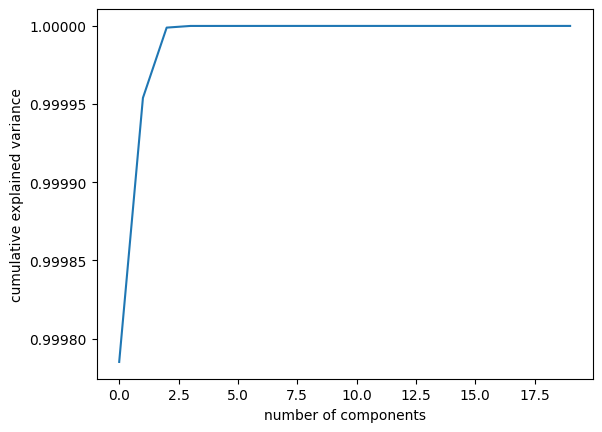

In [17]:
pca = PCA().fit(cars.drop('Price',axis=1))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Performing PCA

In [18]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)

In [19]:
pca_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2','PC3'])
pca_df['Price']=cars['Price']
print(pca_df.head())

        PC1       PC2       PC3   Price
0 -1.229428 -0.921661 -0.218030  759107
1 -1.307104 -1.067603  0.300186  505071
2 -1.040090 -0.336008  0.561877  635322
3  0.053331  0.456292  0.730595  483152
4 -0.007077 -0.246879  0.337828  712961


In [20]:
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.08267151 0.0585255  0.05565101]


Modeling using random forest regressor

In [21]:
# Features and target
X = pca_df.drop('Price', axis=1)
y = pca_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 59926248465.01289


Modeling without PCA reduced features

In [22]:
# Features and target
X = cars.drop('Price', axis=1)
y = cars['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 57819314365.75888


In [26]:
rf_regressor.fit(X_train,y_train)
y_predict=rf_regressor.predict(X_test)
residuals=y_test-y_predict
residuals

1447    -78209.32
1114   -156838.92
1064   -299760.11
2287   -333563.02
1537    289162.11
          ...    
2375    171752.00
1609     18225.03
596     103582.74
84      256479.67
2213     46925.67
Name: Price, Length: 500, dtype: float64

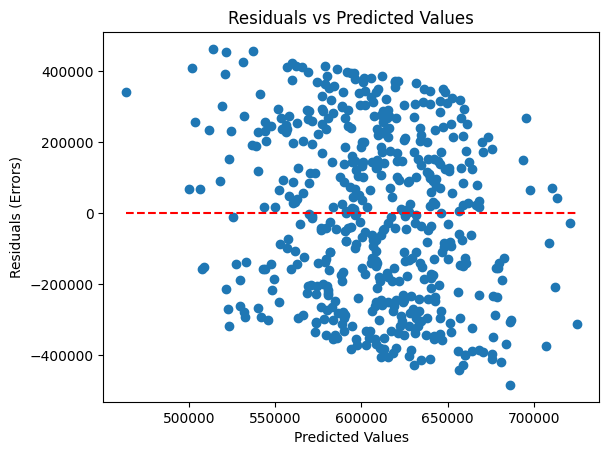

In [30]:
plt.scatter(y_predict, residuals)
plt.hlines(y=0, xmin=np.min(y_predict), xmax=np.max(y_predict), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted Values')
plt.show()


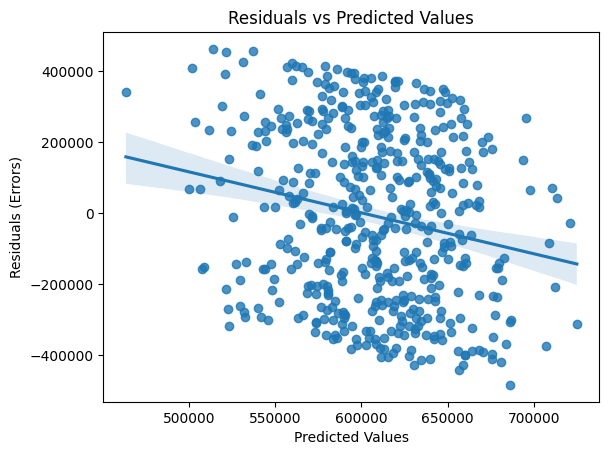

In [31]:
sns.regplot(x=y_predict, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted Values')
plt.show()
#

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Elastic Net model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Train the model
elastic_net.fit(X_train, y_train)

# Predict
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 55284184360.657326


In [35]:
elastic_net.fit(X_train,y_train)
y_predict=elastic_net.predict(X_test)
residuals=y_test-y_predict
residuals

1447    -77620.034509
1114   -208073.218958
1064   -206810.395047
2287   -377653.132718
1537    258484.894201
            ...      
2375    198243.091395
1609    -43555.926175
596     141986.996734
84      160098.103815
2213     45071.921153
Name: Price, Length: 500, dtype: float64

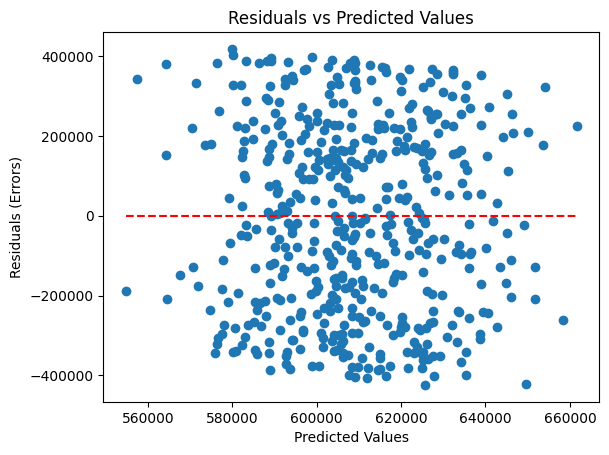

In [36]:
plt.scatter(y_predict, residuals)
plt.hlines(y=0, xmin=np.min(y_predict), xmax=np.max(y_predict), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted Values')
plt.show()


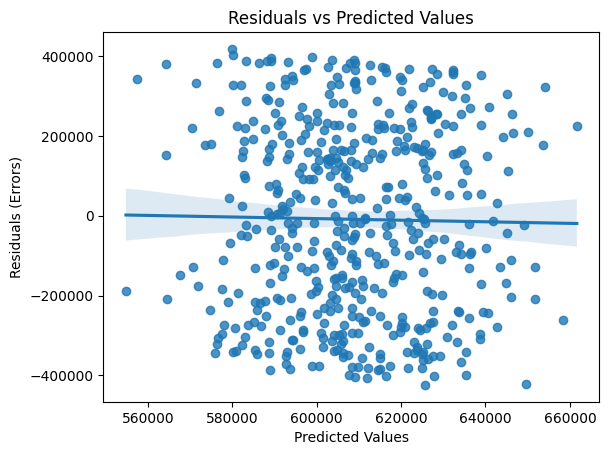

In [37]:
sns.regplot(x=y_predict, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals vs Predicted Values')
plt.show()

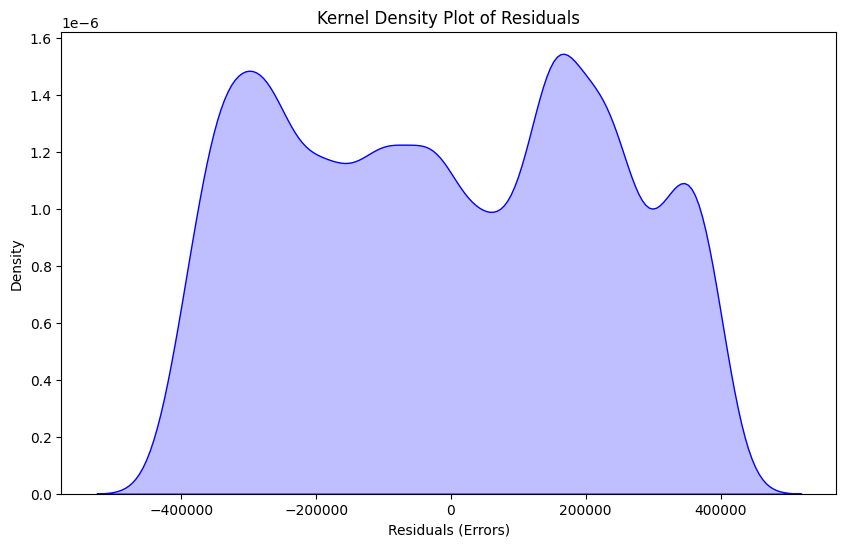

In [39]:


# KDE plot of residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, fill=True, color="blue", bw_adjust=0.5)
plt.xlabel('Residuals (Errors)')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Residuals')
plt.show()